In [1]:
import os
import numpy as np
from scipy import stats
import colorsys
from skimage.io import imread
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from PIL.ImageColor import getcolor
from statistics import median, variance
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%run ../functions.ipynb

def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

Number of unique colors in the segmented image
184


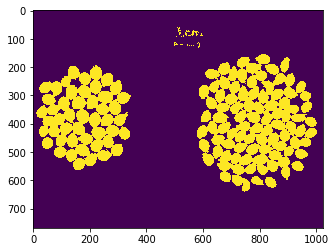

In [15]:
image = imread('kernels1-256.png')
segged, filt = segment(image, return_filter=True)

image1 = Image.fromarray(segged)
plt.imshow(segged)

print("Number of unique colors in the segmented image")
image_array = np.asarray(segged)
image_flat = image_array.reshape((image_array.shape[0]* image_array.shape[1], image_array.shape[2]))
print(len(np.unique(image_flat, axis=0)))

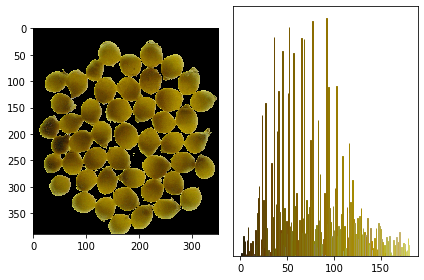

In [3]:
cropped1 = image1.crop((0,170,350,560))
filter1 = filt[170:560, :350]
colors1 = cropped1.getcolors(256)
colors1.sort(key=lambda x: x[1][0])

fig, ax = plt.subplots(ncols=2, subplot_kw = {'autoscaley_on':True})
ax[0].imshow(np.asarray(cropped1))
ax[1].get_yaxis().set_visible(False)
for idx, c in enumerate(colors1):
    if c[1] == (0,0,0):
        continue
    ax[1].bar(idx, c[0], color=hexencode(c[1]),edgecolor=hexencode(c[1]))
plt.tight_layout()
plt.show()

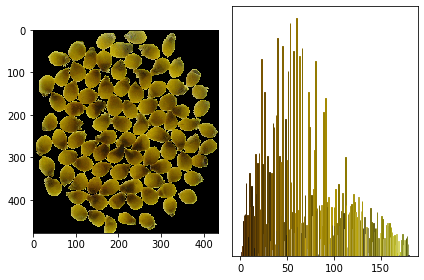

In [26]:
cropped2 = image1.crop((572,158, 1007, 635))
filter2 = filt[158:635, 572:1007]
colors2 = cropped2.getcolors(256)

colors2.sort(key=lambda x: colorsys.rgb_to_hsv(*x[1])[0])

fig, ax = plt.subplots(ncols=2, subplot_kw = {'autoscaley_on':True})
ax[0].imshow(np.asarray(cropped2))
ax[1].get_yaxis().set_visible(False)
for idx, c in enumerate(colors2):
    if c[1] == (0,0,0):
        continue
    ax[1].bar(idx, c[0], color=hexencode(c[1]),edgecolor=hexencode(c[1]))
plt.tight_layout()
plt.show()

In [5]:
sum1, sum2 = 0, 0
count1, count2 = 0, 0

hues1 = [x for sublist in [c[0]*[colorsys.rgb_to_hsv(*c[1])[0]] for c in colors1] for x in sublist]
hues2 = [x for sublist in [c[0]*[colorsys.rgb_to_hsv(*c[1])[0]] for c in colors2] for x in sublist]

mean1 = sum(hues1) / len(hues1)
mean2 = sum(hues2) / len(hues2)

var1 = variance(hues1)
var2 = variance(hues2)

med1 = median(hues1)
med2 = median(hues2)

print("First image mean: " + str(mean1))
print("Second image mean: " + str(mean2))
print("First image variance: " + str(var1))
print("Second image variance: " + str(var2))
print("First image median: " + str(med1))
print("Second image median: " + str(med2))

First image mean: 0.07166248220834659
Second image mean: 0.0773545002049472
First image variance: 0.004452951403854066
Second image variance: 0.004436871567414022
First image median: 0.1134020618556701
Second image median: 0.11585365853658536


(array([86645.,   803.,  5178., 13930., 21327., 31186., 26510., 12444.,
         7128.,  2344.]),
 array([-102.96643572,  -71.55195186,  -40.137468  ,   -8.72298414,
          22.69149972,   54.10598358,   85.52046744,  116.9349513 ,
         148.34943516,  179.76391902,  211.17840288]),
 <a list of 10 Patch objects>)

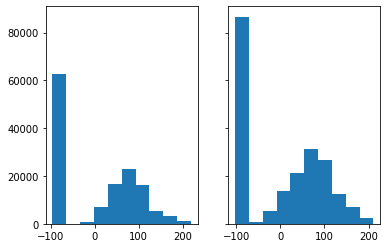

In [6]:
hsv1 = cropped1.convert('HSV')
hsv_cols1 = hsv1.getcolors(256)
hsv1_ar = np.asarray(cropped1)
hsv1_ar = hsv1_ar.reshape((hsv1_ar.shape[0] * hsv1_ar.shape[1], hsv1_ar.shape[2]))

hsv2 = cropped2.convert('HSV')
hsv_cols2 = hsv2.getcolors(256)
hsv2_ar = np.asarray(cropped2)
hsv2_ar = hsv2_ar.reshape((hsv2_ar.shape[0] * hsv2_ar.shape[1], hsv2_ar.shape[2]))

pca1 = PCA(n_components=1)
X1 = pca1.fit_transform(hsv1_ar)

pca2 = PCA(n_components=1)
X2 = pca2.fit_transform(hsv2_ar)

fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey=True)
ax[0].hist(X1)
ax[1].hist(X2)

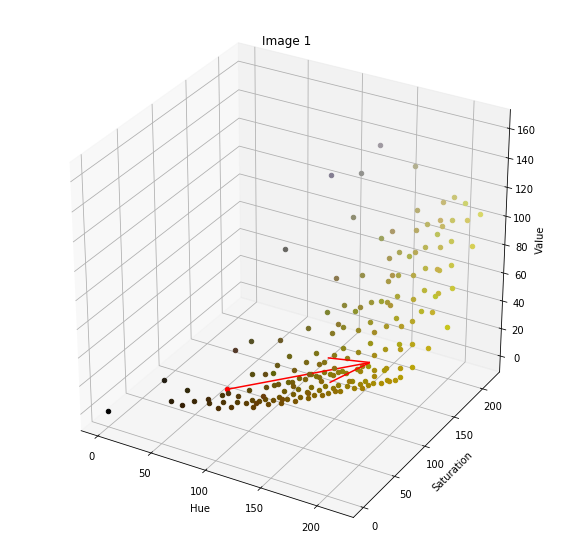

In [7]:
uniq1 = np.unique(hsv1_ar, axis=0)
h1, s1, v1 = uniq1[:,0], uniq1[:,1], uniq1[:,2]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.set_title('Image 1')

for [h, s, v] in uniq1:
    ax.scatter(h, s, v, color=hexencode((h,s,v)))


ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')

x1_0, y1_0, z1_0 = pca1.mean_.tolist()
x1_1, y1_1, z1_1 = (pca1.components_[0] * np.cbrt(pca1.explained_variance_)).tolist()

v1_x, v1_y, v1_z = [x1_0, x1_0 + x1_1], [y1_0, y1_0 + y1_1], [z1_0, z1_0 + z1_1]

ax.scatter(x1_0,y1_0,z1_0, c='r')
ax.quiver(x1_0, y1_0, z1_0, x1_0 + x1_1, y1_0 + y1_1, z1_0 + z1_1, color='r')

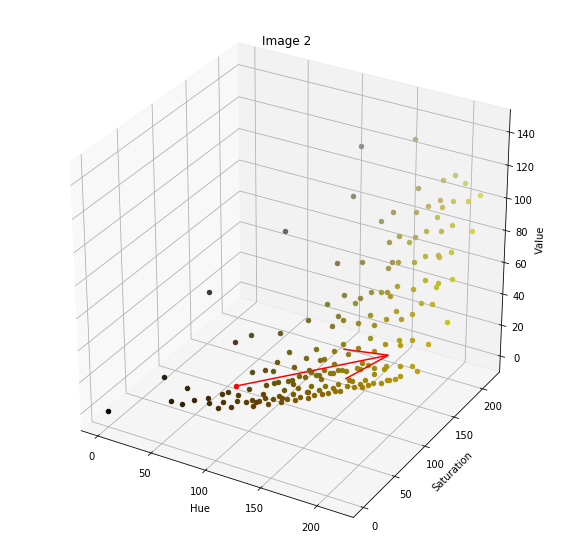

In [8]:
uniq2 = np.unique(hsv2_ar, axis=0)
h2, s2, v2 = uniq2[:,0], uniq2[:,1], uniq2[:,2]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.set_title('Image 2')

# ax.scatter(h1, s1, v1)

for [h, s, v] in uniq2:
    ax.scatter(h, s, v, color=hexencode((h,s,v)))
    
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')

x2_0, y2_0, z2_0 = pca2.mean_.tolist()
x2_1, y2_1, z2_1 = (pca2.components_[0] * np.cbrt(pca2.explained_variance_)).tolist()

v2_x, v2_y, v2_z = [x2_0, x2_0 + x2_1], [y2_0, y2_0 + y2_1], [z2_0, z2_0 + z2_1]

ax.scatter(x2_0,y2_0,z2_0, c='r')
ax.quiver(x2_0, y2_0, z2_0, x2_0 + x2_1, y2_0 + y2_1, z2_0 + z2_1, color='r')
# ax.plot([x1_0, x1_0 + x1_1], [y1_0, y1_0 + y1_1], zs = [0, z1_0 + z1_1], color='r')

# Sort the colors along the Principal Component

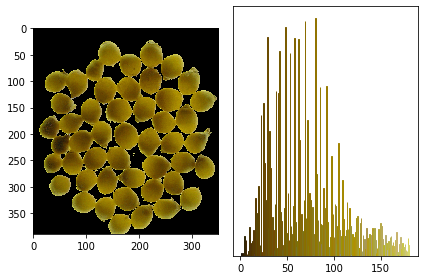

In [9]:
pca1_vector = [x1_1,y1_1,z1_1]

colors1_pca_sorted = sorted(colors1, key = lambda color: np.dot(pca1_vector, color[1]))
fig, ax = plt.subplots(ncols=2, subplot_kw = {'autoscaley_on':True})
ax[0].imshow(np.asarray(cropped1))
ax[1].get_yaxis().set_visible(False)
for idx, c in enumerate(colors1_pca_sorted):
    if c[1] == (0,0,0):
        continue
    ax[1].bar(idx, c[0], color=hexencode(c[1]),edgecolor=hexencode(c[1]))
plt.tight_layout()
plt.show()

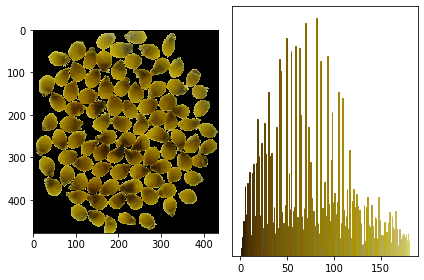

In [48]:
pca2_vector = [x2_1, y2_1, z2_1]

colors2_pca_sorted = sorted(colors2, key = lambda color: np.dot(pca2_vector, color[1]))
fig, ax = plt.subplots(ncols=2, subplot_kw = {'autoscaley_on':True})
ax[0].imshow(np.asarray(cropped2))
ax[1].get_yaxis().set_visible(False)
for idx, c in enumerate(colors2_pca_sorted):
    if c[1] == (0,0,0):
        continue
    try:
        ax[1].bar(idx, c[0], color=hexencode(c[1]), edgecolor=hexencode(c[1]))
    except:
        print("Error: " + str(c[1]))
plt.tight_layout()
plt.show()

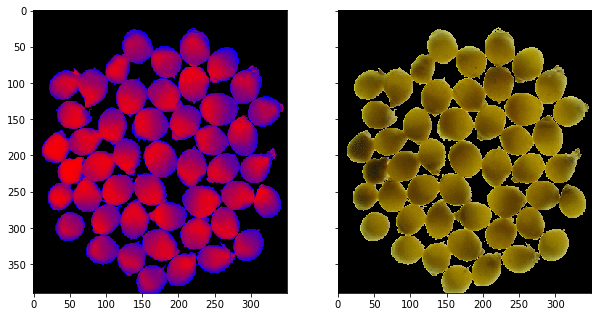

In [49]:
heat1 = np.asarray(cropped1).copy()

heat1_flat = heat1.reshape((heat1.shape[0] * heat1.shape[1], heat1.shape[2]))

scale1 = 255 / len(colors1_pca_sorted)

for i, (_, color) in enumerate(colors1_pca_sorted):
    heat1_flat[((heat1_flat == color).all(axis=1))] = [255 - scale1 * i, 0, scale1 * i]

    
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10,10))
heat1 = heat1_flat.reshape(heat1.shape)
heat1[filter1 == 0] = [0,0,0]
ax[0].imshow(heat1)
ax[1].imshow(np.asarray(cropped1))  

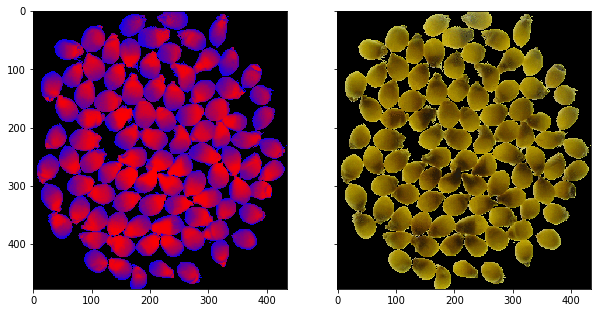

In [50]:
heat2 = np.asarray(cropped2).copy()

heat2_flat = heat2.reshape((heat2.shape[0] * heat2.shape[1], heat2.shape[2]))

scale2 = (255 / len(colors2_pca_sorted))

for i, (_, color) in enumerate(colors2_pca_sorted):
    heat2_flat[((heat2_flat == color).all(axis=1))] = [255 - scale2 * i, 0, scale2 * i]

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10,10))
heat2 = heat2_flat.reshape(heat2.shape)
heat2[filter2 == 0] = [0,0,0]
ax[0].imshow(heat2)
ax[1].imshow(np.asarray(cropped2))

In [13]:
total1 = [col for sublist in [c[0] * [c[1]] for c in colors1_pca_sorted] for col in sublist]
total2 = [col for sublist in [c[0] * [c[1]] for c in colors2_pca_sorted] for col in sublist]
stats.describe(total1)

DescribeResult(nobs=136500, minmax=(array([0, 0, 0]), array([216, 215, 161])), mean=array([73.72938462, 60.41610256,  7.8421978 ]), variance=array([5002.89445885, 3627.58717798,  396.08280603]), skewness=array([0.06676644, 0.28252682, 3.48120277]), kurtosis=array([-1.70967304, -1.36285636, 12.47182676]))

# Segment and extract kernels
# Rate Kernels on PCA range
1. Dot product average pixel of the pca eigen vector (PCA index)
2. Classify by bin
3. Store result
# Ouput image with kernels rated
1. Draw rating on 
2. Sum ratings to get ratios of ratings